In [ ]:
import sympy
from sympy import  Matrix, symbols, latex, S, lambdify, Symbol
from sympy import  sin as Sin
from sympy import  cos as Cos
from sympy import  pi as Pi
from sympy.vector import CoordSys3D, Vector, matrix_to_vector, AxisOrienter, express
from IPython.display import Latex
import pandas as pd
from dataclasses import dataclass, field
import numpy as np
import matplotlib.pyplot as plt

# Практическое занятие 10
# Компьютерный практикум по алгебре на Python
## Векторы
### Задание 1.
Задать систему координат с именем '1'.
Найти скалярное и векторное произведение векторов $a(-\cos(\pi/4), \sin(\pi/3), 1)$ и $b(2, -1, 3)$.

In [ ]:
coord_sys = CoordSys3D('1')
a_vec = -Cos(Pi/4)*coord_sys.i + Sin(Pi/3)*coord_sys.j + coord_sys.k
b_vec = 2*coord_sys.i - coord_sys.j + 3*coord_sys.k
display(Latex(f"\\text{{(a, b) = }}{latex(a_vec & b_vec)}"))
display(Latex(f"\\text{{[a x b] = }}{latex(a_vec ^ b_vec)}"))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Задание 2
Ввести безымянную систему координат $M$ и символы $\varphi$ и $c$.
Вычислить $5u\cdot(v - u)$ и $((2v + u)\times(v - 3u)) $,

$u = (\cos(\varphi), 2c - 5, \sin(2\varphi))$, $v = (\sin(\varphi), 2c  + 5, \cos(2\varphi))$.

Скалярное произведение обозначено $\cdot$, векторное $\times$.
Использовать  & и ^, скобки расставить как в условии, поскольку приоритет у & и ^ ниже, чем у + и -. Упростить полученное выражение.

In [ ]:
M = CoordSys3D('')
phi, c = symbols("φ c")

u = Cos(phi)*M.i + (2*c -5)*M.j + Sin(2*phi)*M.k
v = Sin(phi)*M.i + (2*c + 5)*M.j + Cos(2*phi)*M.k
expr1 = 5*u & (v-u)
expr2 = ((2*v + u) ^ (v - 3 * u))
display(expr1.factor().trigsimp())
display(expr2.factor().trigsimp())

100*c + 5*sqrt(2)*sin(4*φ + pi/4)/2 - 5*sqrt(2)*cos(2*φ + pi/4)/2 - 255

(7*sqrt(2)*(2*c*cos(2*φ + pi/4) - 5*sin(2*φ + pi/4)))*.i + (-7*cos(3*φ))*.j + (7*sqrt(2)*(2*c*cos(φ + pi/4) + 5*sin(φ + pi/4)))*.k

### Задание 3
В файле "sem_10_task_3.xlsx" записаны имена векторов и соответствующие значения параметров $p$, $q$ и углов $\phi$ **в градусах**.

Вывести на экран для каждого вектора $g(p^2 + 2pq - 3, \cos(\phi), \sin^2(\phi))$ его имя,  координаты  вектора, его длину и проекции на координатные оси. Все вычисления производить аналитически, в том числе переводить градусы в радианы.

In [ ]:
from google.colab import files
import pandas as pd
uploaded = files.upload() # загружаем нужные файлы, обращаться к ним будем по имени
for file_name in uploaded.keys():
    print(f'Загружен файл {file_name}')

Saving sem_12_task_6_12.xlsx to sem_12_task_6_12.xlsx
Saving sem_12_task_6_11.xlsx to sem_12_task_6_11.xlsx
Saving sem_12_task_6_10.xlsx to sem_12_task_6_10.xlsx
Saving sem_12_task_6_9.xlsx to sem_12_task_6_9.xlsx
Saving sem_12_task_6_8.xlsx to sem_12_task_6_8.xlsx
Saving sem_12_task_6_7.xlsx to sem_12_task_6_7.xlsx
Saving sem_12_task_6_6.xlsx to sem_12_task_6_6.xlsx
Saving sem_12_task_6_5.xlsx to sem_12_task_6_5.xlsx
Saving sem_12_task_6_4.xlsx to sem_12_task_6_4.xlsx
Saving sem_12_task_6_3.xlsx to sem_12_task_6_3.xlsx
Saving sem_12_task_6_2.xlsx to sem_12_task_6_2.xlsx
Saving sem_12_task_6_1.xlsx to sem_12_task_6_1.xlsx
Загружен файл sem_12_task_6_12.xlsx
Загружен файл sem_12_task_6_11.xlsx
Загружен файл sem_12_task_6_10.xlsx
Загружен файл sem_12_task_6_9.xlsx
Загружен файл sem_12_task_6_8.xlsx
Загружен файл sem_12_task_6_7.xlsx
Загружен файл sem_12_task_6_6.xlsx
Загружен файл sem_12_task_6_5.xlsx
Загружен файл sem_12_task_6_4.xlsx
Загружен файл sem_12_task_6_3.xlsx
Загружен файл sem

In [ ]:
from sympy import rad

file_name = "sem_10_task_3.xlsx"
rqz = pd.read_excel(file_name)

res_1 = rqz.to_numpy()
for x in res_1:
  p = x[1]
  q = x[2]
  phi = rad(x[3])
  display(x[0])
  g = ( (p**2 + 2*p*q - 3)*M.i ) + ( Cos(phi)*M.j ) + ( (Sin(phi)**2)*M.k )
  g_simplified = g.factor().trigsimp()
  display(Latex(r"\text{g = }" + " = ".join(map(latex, (g, g_simplified)))))
  display(Latex(fr"\text{{length = }}{latex(g_simplified.magnitude())}"))
  display(Latex(r"\\".join(map(": ".join, zip(
    ("i", "j", "k"),
    map(latex, (axis.projection(g_simplified) for axis in (M.i, M.j, M.k)))
  )))))
  for coords in g.components.values():
    display(coords)
  print()

'VectFirst'

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

2

1/2

3/4

'VectSecond'

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

5

sqrt(2)/2

1/2

'VectThird'

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

30

sqrt(3)/2

1/4

'VectFourth'

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

82

1

### Задание  4
Преобразовать матрицу $\left(\begin{matrix}-q\\ p\\ q + p\end{matrix}\right)$ в вектор в безымянной системе координат.

Вывести на экран матрицу и ее представление в системе координат, а затем вывести векторное представление при $q$ и $p$ из Задания 3 на отдельных строках (использовать цикл, пар $q$ и $p$ столько, сколько векторов в файле Задания 3).

In [ ]:
p,q = symbols('p q')
A = Matrix((-q, p, q+p))
display()
display(matrix_to_vector(A, CoordSys3D('')))
for x in res_1:
  display(matrix_to_vector(A.subs({p : x[1], q:x[2]}), CoordSys3D("")))


(-q)*.i + p*.j + (p + q)*.k

(-2)*.i + .j + 3*.k

(-1)*.i + 2*.j + 3*.k

(-4)*.i + 3*.j + 7*.k

(-6)*.i + 5*.j + 11*.k

### Задание 5*.
Описать функцию new_cs_rotate с обязательными аргументами cs (старая система координат) и vect (вектор в системе cs) и необязательным аргументом angle - углом поворота системы координат **относительно оси $j$** против часовой стрелки (в радианах, по умолчанию 0). Функция возвращает матрицу поворота, вектор в новой системе координат в векторном и матричном виде (кортеж из 3 элементов).

Для тестирования функции ввести систему координат  $M5$ и вектор с координатами (1, -2, 5). С помощью функции получить представления этого вектора в новой системе координат, которая получается поворотом  на угол $\pi/4$ относительно оси $j$ против и по часовой стрелке.

Вывести на экран вектор $b5$ в старой системе координат $M$, в новой системе и матрицу поворота (два случая поворота - по и против часовой стрелки!).

In [ ]:
def new_cs_rotate(cs, vect, angle=0):


    new_cs = cs.orient_new_axis('new', angle, cs.j)  # ось j всегда cs.j
    r_mat = cs.rotation_matrix(new_cs)
    new_vect = vect.to_matrix(new_cs)
    new_mat = matrix_to_vector(new_vect, new_cs)
    return r_mat, new_vect, new_mat



M5 = CoordSys3D('M5')
b5 = M5.i - 2*M5.j + 5*M5.k
angle = sympy.pi / 4
display(b5)
print()
for x in new_cs_rotate(M5, b5, angle):
  display(x)
print()
for x in new_cs_rotate(M5, b5, -angle):
  display(x)

M5.i + (-2)*M5.j + 5*M5.k

Matrix([
[ sqrt(2)/2, 0, sqrt(2)/2],
[         0, 1,         0],
[-sqrt(2)/2, 0, sqrt(2)/2]])

Matrix([
[-2*sqrt(2)],
[        -2],
[ 3*sqrt(2)]])

(-2*sqrt(2))*new.i + (-2)*new.j + (3*sqrt(2))*new.k

Matrix([
[sqrt(2)/2, 0, -sqrt(2)/2],
[        0, 1,          0],
[sqrt(2)/2, 0,  sqrt(2)/2]])

Matrix([
[3*sqrt(2)],
[       -2],
[2*sqrt(2)]])

(3*sqrt(2))*new.i + (-2)*new.j + (2*sqrt(2))*new.k

### Задание 6.
Вектор $a\_vect(3, -4, 2)$ задан в безымянной системе координат  M.

Вывести на экран матричные представления вектора $a\_vect$ в
системе координат, полученной из   M поворотом на $2\phi$ **по** часовой стрелке относительно оси, определяемой вектором $(p + q, pq, p^2)$ ($\phi$, $p$, $q$ из Задания 3). Выразить вектор $a\_vect$ в каждой новой системе координат и вывести **координаты** вектора на экран.

In [ ]:
M = CoordSys3D('')
a_vect = 3*M.i - 4*M.j + 2*M.k

for x in res_1:
  p = x[1]
  q = x[2]
  phi = rad(x[3])
  new_M = M.orient_new_axis(name = 'new', angle =2*phi, axis = (p+q)*M.i + p*q*M.j + p*p*M.k )
  new_a = express(a_vect, new_M)
  for x in new_a.components.values():
    display(x)
  print()

-2*sqrt(42)/7 - 15/28

3*sqrt(42)/28 + 37/14

-19/28 + 9*sqrt(42)/14

27/29 - 20*sqrt(29)/29

18/29 - 6*sqrt(29)/29

36/29 + 18*sqrt(29)/29

759/548 - 15*sqrt(822)/137

-301/137 - 13*sqrt(822)/548

467/548 + 16*sqrt(822)/137

-2876/823

2182/823

-2571/823

### Задание 7*.
Описать функцию func7 от аргумента phi (угол в радианах). Функция возвращает полученную с помощью метода magnitude длину вектора $vect(\sin(\phi),\ \cos(\phi),\ \sin(\phi) + 3\cos(\phi))$. При помощи lambdify построить функцию func7np (двойник этой функции  для использования с numpy). Использовать func7np для построения графика зависимости длины вектора vect от phi при phi от 0 до 4 с шагом 0.1.

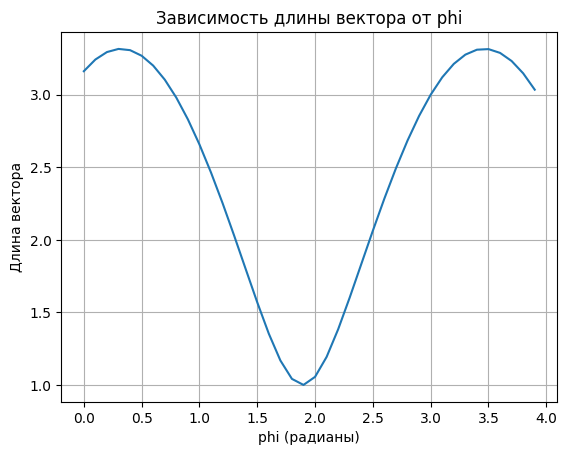

In [ ]:
def func7(phi):
  M = CoordSys3D('')
  vect = Sin(phi)*M.i + Cos(phi)*M.j + (Sin(phi) + 3*Cos(phi))*M.k
  return vect.magnitude()

phi = Symbol('φ')
func7np = lambdify(phi, func7(phi), 'numpy')

phi_values = np.arange(0, 4, 0.1)

magnitude_values = func7np(phi_values)

plt.plot(phi_values, magnitude_values)
plt.xlabel('phi (радианы)')
plt.ylabel('Длина вектора')
plt.title('Зависимость длины вектора от phi')
plt.grid(True)
plt.show()

### Индивидуальное задание.
Ввести безымянную систему координат XYZ, задать в ней векторы $v_1$ и $v_2$. Построить новую систему координат XYZ1 с именем Name поворотом  XYZ на $\alpha$ по часовой стрелке (или против) относительно оси, определяемой вектором $b$, выразить векторы $v_1$ и $v_2$ в новой системе координат. Найти скалярное и векторное произведение векторов в новой и старой системе координат. Выразить вектор, равный векторному произведению $v_1$ и $v_2$ в старой системе координат через новую систему координат, сравнить с векторным произведением $v_1$ и $v_2$, выраженных в новой системе координат.

In [ ]:
XYZ = CoordSys3D('')
i, j, k = XYZ.i, XYZ.j, XYZ.k
v1 = 5*i - 3*j + 9*k
v2 = 7*i - 4*j - 7*k
XYZ1 = XYZ.orient_new_axis(name="n", angle=-Pi/3, axis=9*i - 8*j)
v1_XYZ1 = sympy.simplify(express(v1, XYZ1))
v2_XYZ1 = sympy.simplify(express(v2, XYZ1))
v3 = sympy.simplify(v1 ^ v2)
v3_XYZ1 = sympy.simplify(v1_XYZ1 ^ v2_XYZ1)
v3_XYZ1_expressed = sympy.simplify(express(v3, XYZ1))
display(v3_XYZ1, v3_XYZ1_expressed)

(2913/145 - 4*sqrt(435)/145)*n.i + (8189/145 - 9*sqrt(435)/290)*n.j + (1/2 + 669*sqrt(435)/145)*n.k

(2913/145 - 4*sqrt(435)/145)*n.i + (8189/145 - 9*sqrt(435)/290)*n.j + (1/2 + 669*sqrt(435)/145)*n.k